# Temperature Prediction Model

### Importing Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
data = pd.read_csv('temperature.csv')

In [4]:
data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


### This problem is solved using Linear Regression

In [5]:
data.shape

(7752, 25)

In [6]:
data.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

## EDA process

In [7]:
data.describe()


,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


## Checking null values

In [8]:
data.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

# Handling null values

In [9]:
#1. Function to replace NAN values with mode value this both rows are categorical,
#not numeric based with datatype of float or int
def impute_nan_most_frequent_category(data,ColName):
    # .mode()[0] - gives first category name
     most_frequent_category=data[ColName].mode()[0]
    
    # replace nan values with most occured category
     #data[ColName + "_Imputed"] = data[ColName]
     #data[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)
     data[ColName] = data[ColName]
     data[ColName].fillna(most_frequent_category,inplace=True)

In [10]:
data.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [11]:
#2. Call function to impute most occured category
for Columns in ['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'Next_Tmax', 'Next_Tmin']:
    impute_nan_most_frequent_category(data,Columns)
    
# Display imputed result
data[['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'Next_Tmax', 'Next_Tmin']].head(10)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,31.2,22.5
5,6.0,30-06-2013,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,0.185279,0.280818,0.232841,0.146363,0.0,0.0,0.0,0.0,31.5,24.0
6,7.0,30-06-2013,31.4,24.4,56.287189,81.019760,28.551859,24.238467,5.587135,125.110007,0.389600,0.333570,0.270419,0.145705,0.0,0.0,0.0,0.0,30.9,23.4
7,8.0,30-06-2013,32.1,23.6,52.326218,78.004539,28.851982,23.819054,6.104417,42.011547,0.357856,0.344928,0.272387,0.143841,0.0,0.0,0.0,0.0,31.1,22.9
8,9.0,30-06-2013,31.4,22.0,55.338791,80.784607,28.426975,23.332373,6.017135,85.110971,0.408766,0.344800,0.264980,0.148911,0.0,0.0,0.0,0.0,31.3,21.6
9,10.0,30-06-2013,31.6,20.5,56.651203,86.849632,27.576705,22.527018,6.518841,63.006075,0.348292,0.306255,0.245254,0.135443,0.0,0.0,0.0,0.0,30.5,21.0


In [12]:
#Rechecking null values in dataset 
data.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

### Null values are handled

# Categories

In [13]:
data.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [14]:
print("Number of Categories: ")
for ColName in data[['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']]:
    print("{} = {}".format(ColName,len(data[ColName].unique())))


Number of Categories: 
station = 25
Date = 310
Present_Tmax = 167
Present_Tmin = 155
LDAPS_RHmin = 7672
LDAPS_RHmax = 7664
LDAPS_Tmax_lapse = 7675
LDAPS_Tmin_lapse = 7675
LDAPS_WS = 7675
LDAPS_LH = 7675
LDAPS_CC1 = 7569
LDAPS_CC2 = 7582
LDAPS_CC3 = 7599
LDAPS_CC4 = 7524
LDAPS_PPT1 = 2812
LDAPS_PPT2 = 2510
LDAPS_PPT3 = 2356
LDAPS_PPT4 = 1918
lat = 12
lon = 25
DEM = 25
Slope = 27
Solar radiation = 1575
Next_Tmax = 183
Next_Tmin = 157


# Visualization of categories and data

For categorical data we can use: counterplot and for numerical data we can use: distplot 

<AxesSubplot:xlabel='station', ylabel='Density'>

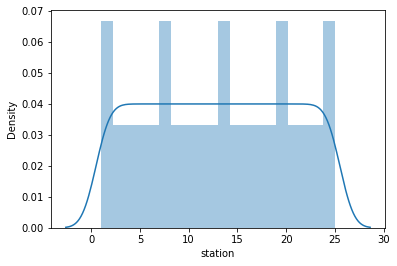

In [16]:
import seaborn as sns
sns.distplot(data['station'],kde=True)

There is lot of overfitting present in station feature

In [18]:
data['station'].describe()

count    7752.000000
mean       12.996904
std         7.213213
min         1.000000
25%         7.000000
50%        13.000000
75%        19.000000
max        25.000000
Name: station, dtype: float64

# Data Cleaning

### Skewness

In [19]:
data.skew()

station             0.000100
Present_Tmax       -0.276483
Present_Tmin       -0.375457
LDAPS_RHmin         0.202176
LDAPS_RHmax        -1.109283
LDAPS_Tmax_lapse   -0.601161
LDAPS_Tmin_lapse   -0.851245
LDAPS_WS            1.485885
LDAPS_LH            0.586176
LDAPS_CC1           0.460727
LDAPS_CC2           0.474379
LDAPS_CC3           0.643064
LDAPS_CC4           0.671739
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.336871
Next_Tmin          -0.406685
dtype: float64

There is lot of skewness presnt need to be handled

### Outliers

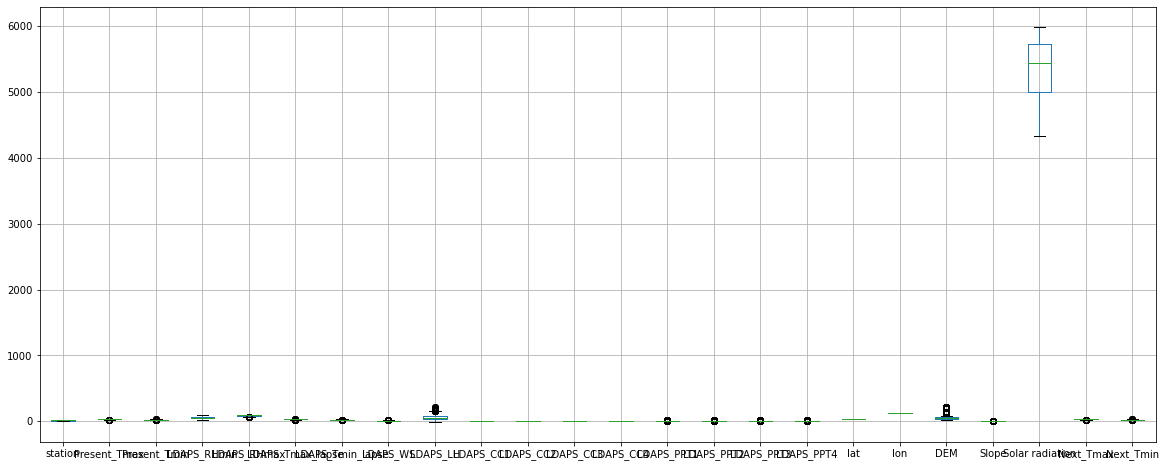

In [21]:
#checking for outliers
data.iloc[:,:].boxplot(figsize=[20,8])
plt.show()

In [22]:
data.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

Observation: Only date is categorical data

# Data Encoding

As the date is categorical, so need to encode the data.

In [23]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [24]:
for i in data.columns:
    if data[i].dtypes == "object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [25]:
data

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,290.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,290.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,290.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,290.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,290.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,304.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,304.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,304.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,1.0,0.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


# Corelation of data with the target variable

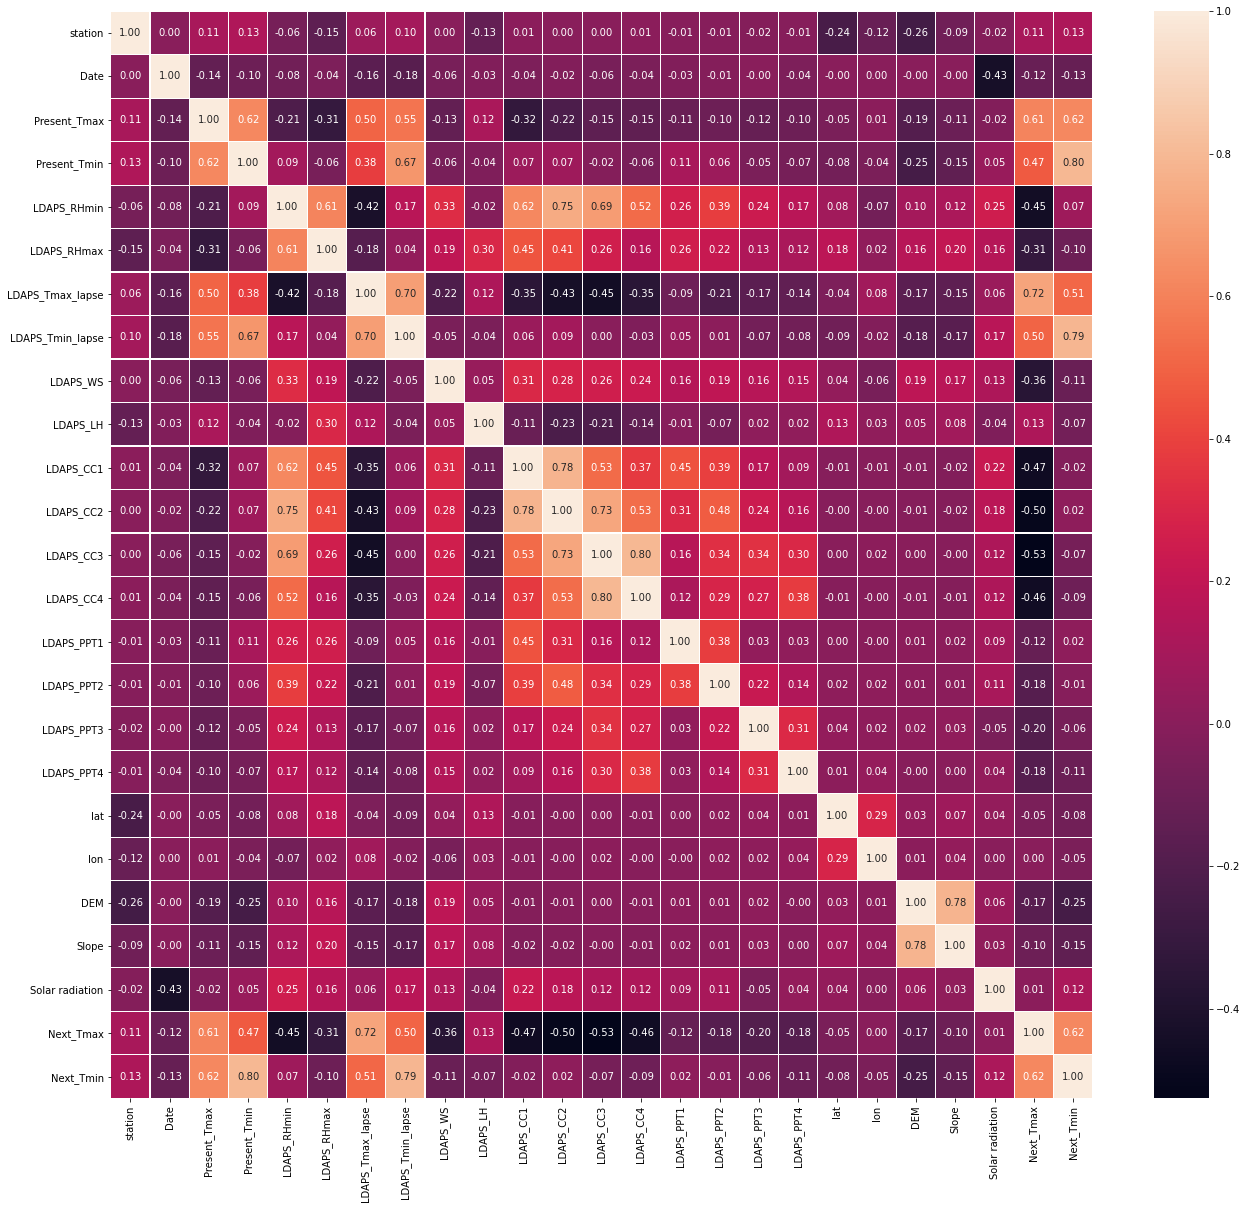

In [26]:
corr_matrix_hmap=data.corr()
plt.figure(figsize=(22,20))
sns.heatmap(corr_matrix_hmap,annot=True,linewidths=0.1,fmt="0.2f")
plt.show()

In [29]:
corr_matrix_hmap["Next_Tmax"].sort_values(ascending=False)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.723211
Next_Tmin           0.621018
Present_Tmax        0.608681
LDAPS_Tmin_lapse    0.503437
Present_Tmin        0.470941
LDAPS_LH            0.127318
station             0.108569
Solar radiation     0.009202
lon                 0.002946
lat                -0.053295
Slope              -0.102327
Date               -0.115919
LDAPS_PPT1         -0.122410
DEM                -0.172171
LDAPS_PPT4         -0.181292
LDAPS_PPT2         -0.181683
LDAPS_PPT3         -0.197191
LDAPS_RHmax        -0.308550
LDAPS_WS           -0.359371
LDAPS_RHmin        -0.454425
LDAPS_CC4          -0.457305
LDAPS_CC1          -0.465100
LDAPS_CC2          -0.502816
LDAPS_CC3          -0.525956
Name: Next_Tmax, dtype: float64

Observation: For Next_Tmax,  LDAPS_Tmax_lapse is maximum corelated

In [31]:
corr_matrix_hmap["Next_Tmin"].sort_values(ascending=False)

Next_Tmin           1.000000
Present_Tmin        0.796333
LDAPS_Tmin_lapse    0.788360
Present_Tmax        0.621846
Next_Tmax           0.621018
LDAPS_Tmax_lapse    0.511372
station             0.128390
Solar radiation     0.119902
LDAPS_RHmin         0.070956
LDAPS_CC2           0.019174
LDAPS_PPT1          0.018670
LDAPS_PPT2         -0.010385
LDAPS_CC1          -0.022926
lon                -0.046522
LDAPS_PPT3         -0.064496
LDAPS_CC3          -0.065164
LDAPS_LH           -0.073270
lat                -0.083677
LDAPS_CC4          -0.094720
LDAPS_RHmax        -0.100040
LDAPS_PPT4         -0.105619
LDAPS_WS           -0.111450
Date               -0.126015
Slope              -0.147148
DEM                -0.247130
Name: Next_Tmin, dtype: float64

Observation: For Next_Tmin,  Present_Tmin is maximum corelated

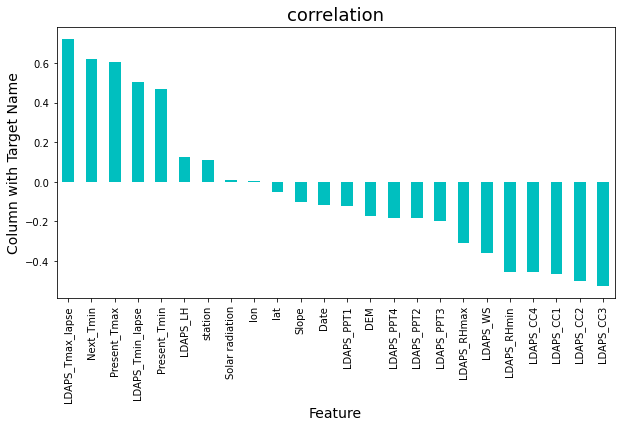

In [32]:
plt.figure(figsize=(10,5))
data.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with Target Name',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()


Mximum Corelated: LDAPS_Tmax_lapse, Minimum Corelated: lon, Negative Corelated:LDAPS_CC3

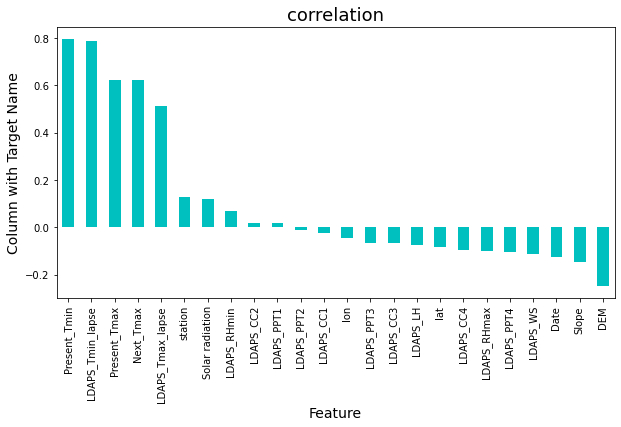

In [33]:
plt.figure(figsize=(10,5))
data.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with Target Name',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()


Mximum Corelated: Present_Tmin, Minimum Corelated: LDAPS_PPT2, Negative Corelated:DEM

# Seperating Independent variable and Target Variable

In [34]:
# x= independent variable
x = data.iloc[:,0:-2]
x.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,1.0,290.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996
1,2.0,290.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500
2,3.0,290.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664
3,4.0,290.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844
4,5.0,290.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246


In [35]:
#y = target variable = Fees 
y = data.iloc[:,-2:]
y.head()

,Next_Tmax,Next_Tmin
0,29.1,21.2
1,30.5,22.5
2,31.1,23.9
3,31.7,24.3
4,31.2,22.5


In [36]:
data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,290.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,290.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,290.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,290.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,290.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [37]:
x.shape

(7752, 23)

In [38]:
y.shape

(7752, 2)

## SCALING the data using Min-Max Scaler

In [39]:
data.describe()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,12.996904,154.460139,29.782946,23.232056,56.401741,88.089988,29.497459,23.423193,7.057092,61.768678,...,0.480310,0.275508,0.266801,37.544722,126.991397,61.867972,1.257048,5341.502803,30.271491,22.934198
std,7.213213,89.517454,2.960585,2.404154,15.038788,7.715499,3.158976,2.503109,2.212072,34.383864,...,1.754900,1.156495,1.200654,0.050352,0.079435,54.279780,1.370444,429.158867,3.123085,2.483502
min,1.000000,0.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,77.000000,27.800000,21.700000,45.735368,84.038809,27.601014,22.032374,5.647741,36.776474,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,154.000000,30.000000,23.400000,54.828714,89.699505,29.662273,23.735942,6.531345,56.487289,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,232.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,...,0.016748,0.007231,0.000000,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,309.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [40]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [41]:
data=mms.fit_transform(data)

In [42]:
data

array([[0.        , 0.93851133, 0.49431818, ..., 1.        , 0.54418605,
        0.53513514],
       [0.04166667, 0.93851133, 0.67613636, ..., 0.92570319, 0.60930233,
        0.60540541],
       [0.08333333, 0.93851133, 0.65909091, ..., 0.92224225, 0.6372093 ,
        0.68108108],
       ...,
       [1.        , 0.98381877, 0.18181818, ..., 0.07323945, 0.48372093,
        0.32972973],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

# Model Training

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state = 42)

In [44]:
x_train.shape

(5426, 23)

In [45]:
y_train.shape

(5426, 2)

In [46]:
x_test.shape

(2326, 23)

In [47]:
y_test.shape

(2326, 2)

In [48]:
data.shape

(7752, 25)

## Finding Best Random State

In [49]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state = i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    mse = r2_score(y_test,predrf)
    if mse > maxAccu:
        maxAccu = mse
        maxRS = i
        
print("Best score is: ",maxAccu,"on Random_state",maxRS)
    
    
    

Best score is:  0.7750591759741962 on Random_state 160


In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state = 160)

In [51]:
LR = LinearRegression()
LR.fit(x_train,y_train)
predrf = LR.predict(x_test)


In [52]:
print('r2 Score:',r2_score(y_test,predrf))

r2 Score: 0.7750591759741962


In [53]:
pred_train = LR.predict(x_train)
pred_test =LR.predict(x_test) 
Train_accuracy = r2_score(y_train,pred_train)
Test_accuracy = r2_score(y_test,pred_test)
maxAccu=0
maxRS=0

from sklearn.model_selection import cross_val_score
for j in range(2,16):
    cv_score=cross_val_score(LR,x,y,cv=j)
    cv_mean = cv_score.mean()
    if cv_mean > maxAccu:
        maxAccu = cv_mean
        maxRS = j
        
    
    
    print(f"At cross fold {j} cv score is {cv_mean} and accuracy score training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")
    

At cross fold 2 cv score is 0.6917825682700038 and accuracy score training is 0.7488586696547672 and accuracy for the testing is 0.7750591759741962


At cross fold 3 cv score is 0.6716054915476103 and accuracy score training is 0.7488586696547672 and accuracy for the testing is 0.7750591759741962


At cross fold 4 cv score is 0.6870707788305128 and accuracy score training is 0.7488586696547672 and accuracy for the testing is 0.7750591759741962


At cross fold 5 cv score is 0.6642872291290953 and accuracy score training is 0.7488586696547672 and accuracy for the testing is 0.7750591759741962


At cross fold 6 cv score is 0.6468156538600972 and accuracy score training is 0.7488586696547672 and accuracy for the testing is 0.7750591759741962


At cross fold 7 cv score is 0.6667326870506584 and accuracy score training is 0.7488586696547672 and accuracy for the testing is 0.7750591759741962


At cross fold 8 cv score is 0.6629498432409294 and accuracy score training is 0.7488586696547672 and

# Regularization

To mitigate the problem of overfitting and underfitting Regularization Methods are used: Lasso, Ridge or ElasticNet .

In [54]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')


In [55]:
#Lasso tries to ommit coefficient value (the value which dont affect y)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [56]:
ls = Lasso(alpha=0.001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.77522375691995

In [57]:
#cross_validation_mean = cv_mean
#cross_validation_score= cv_score

cross_validation_score = cross_val_score(ls,x,y,cv=5)
cross_validation_mean = cross_validation_score.mean()
cross_validation_mean

0.6648944478225658

# Ensemble Technique

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters = {'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

rf = RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [59]:
rf=RandomForestRegressor(criterion="mse",max_features="log2")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=6)
rfc=rfscore.mean()

print("Cross Validation Score:",rfc*100)



R2 Score: 90.29103122393657
Cross Validation Score: 69.3495051258367


# Saving Model

In [60]:
import pickle
filename = "temperature.pkl"
pickle.dump(rf,open(filename,"wb"))


# Load Model

In [61]:
loaded_model=pickle.load(open('temperature.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.9029103122393657


## Our model shows 90% accuracy, which predicts the status of loan